In [1]:
# Copyright 2020-2024 Jordi Corbilla. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

import os
import secrets
import pandas as pd
import argparse
from datetime import datetime

from stock_prediction_class import StockPrediction
from stock_prediction_lstm import LongShortTermMemory
from stock_prediction_numpy import StockData
from stock_prediction_plotter import Plotter
from stock_prediction_readme_generator import ReadmeGenerator
from stock_prediction_deep_learning import train_LSTM_network

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

Ticker: ^FTSE
Start Date: 2017-11-01
Validation Date: 2017-11-01
Test Run Folder: ^FTSE_20240103_ed01876170cabbecee8f465fa0a3d5a8
End Date: 2024-01-03
[*********************100%%**********************]  1 of 1 completed
mean: [0.68902354]
max 0.9999999999999998
min 0.0
Std dev: [0.20211829]
plotting Data and Histogram


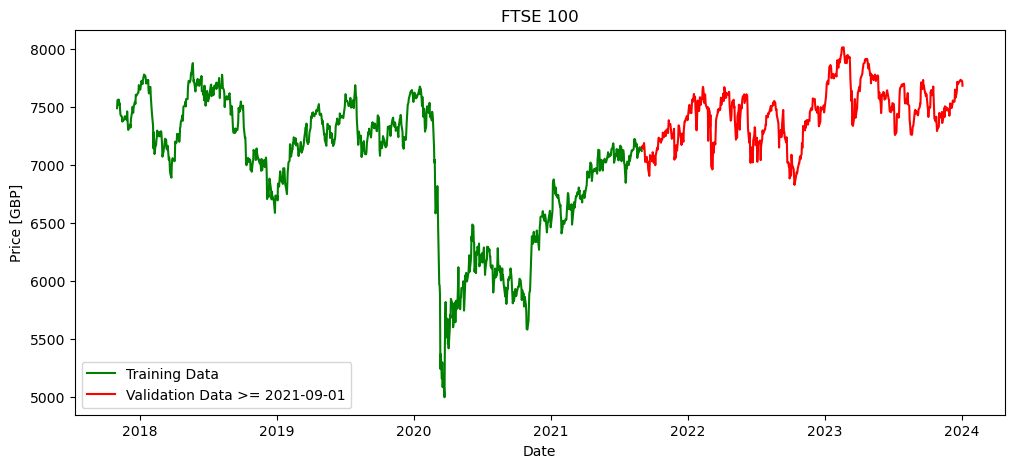

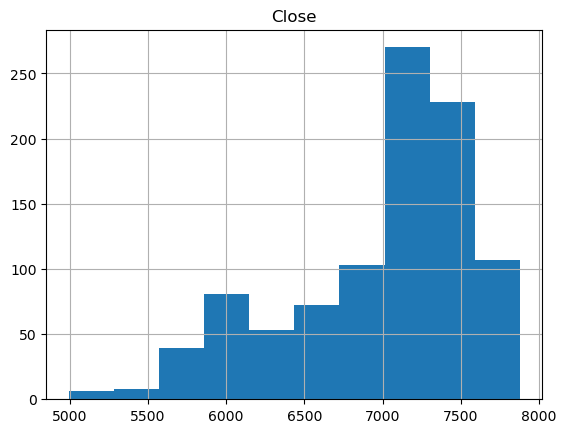

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 3, 100)            40800     
_________________________________________________________________
dropout_4 (Dropout)          (None, 3, 100)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 3, 50)             30200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 3, 50)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 3, 50)             20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 3, 50)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)               

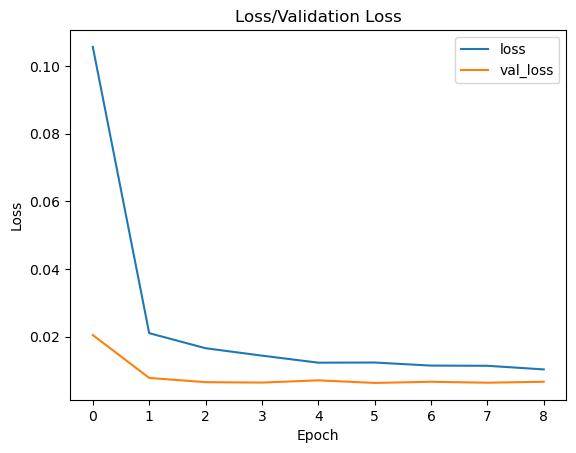

plotting MSE


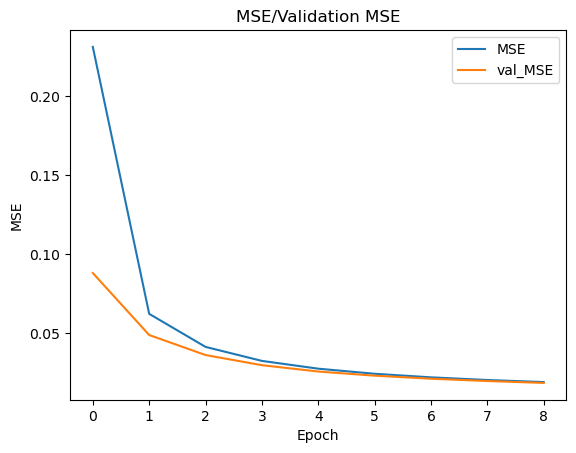

display the content of the model
19/19 - 0s - loss: 0.0066 - MSE: 0.0177
loss :  0.006644091103225946
MSE :  0.017724821344017982

plotting prediction results
plotting predictions


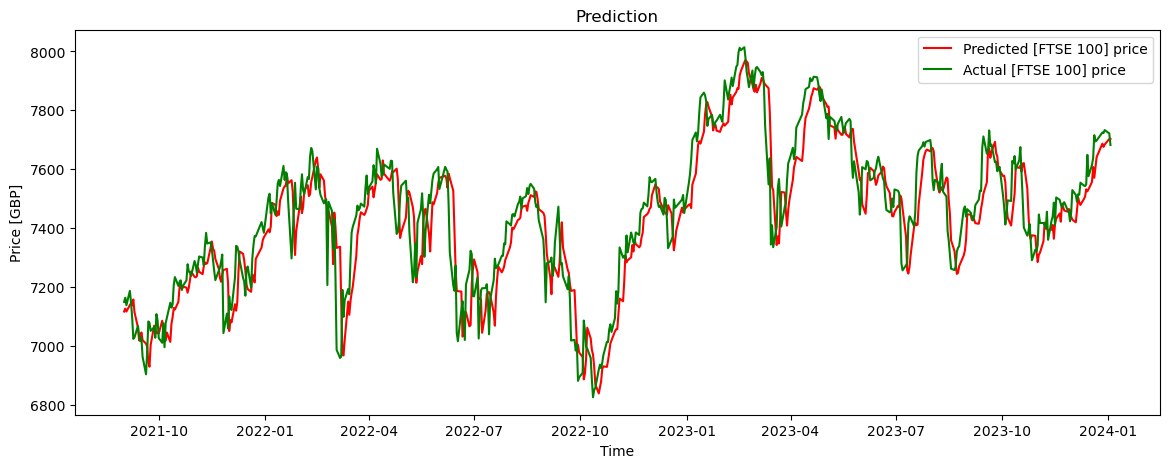

prediction is finished


In [4]:
STOCK_TICKER = "^FTSE"
STOCK_START_DATE = pd.to_datetime("2017-11-01")
STOCK_VALIDATION_DATE = pd.to_datetime("2021-09-01")
EPOCHS = 100
BATCH_SIZE = 10
TIME_STEPS = 3
TODAY_RUN = datetime.today().strftime("%Y%m%d")
TOKEN = STOCK_TICKER + '_' + TODAY_RUN + '_' + secrets.token_hex(16)
GITHUB_URL = "https://github.com/JordiCorbilla/stock-prediction-deep-neural-learning/raw/master/"
print('Ticker: ' + STOCK_TICKER)
print('Start Date: ' + STOCK_START_DATE.strftime("%Y-%m-%d"))
print('Validation Date: ' + STOCK_START_DATE.strftime("%Y-%m-%d"))
print('Test Run Folder: ' + TOKEN)
# create project run folder
PROJECT_FOLDER = os.path.join(os.getcwd(), TOKEN)
if not os.path.exists(PROJECT_FOLDER):
    os.makedirs(PROJECT_FOLDER)

stock_prediction = StockPrediction(STOCK_TICKER, 
                                   STOCK_START_DATE, 
                                   STOCK_VALIDATION_DATE, 
                                   PROJECT_FOLDER, 
                                   GITHUB_URL,
                                   EPOCHS,
                                   TIME_STEPS,
                                   TOKEN,
                                   BATCH_SIZE)
# Execute Deep Learning model
train_LSTM_network(stock_prediction)

In [3]:
PROJECT_FOLDER

'C:\\repo\\stock-prediction-deep-neural-learning\\^FTSE_20240103_edae6b8f5fc742031805151aeba98571'

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from YourStockDataModule import StockData  # Replace with the actual module name
from YourPlottingModule import Plotter  # Replace with the actual module name
from YourLongShortTermMemoryModule import LongShortTermMemory  # Replace with the actual module name

def load_and_predict(stock):
    # Load the saved model
    saved_model_path = os.path.join(stock.get_project_folder(), 'model_weights.h5')
    loaded_model = load_model(saved_model_path)

    # Load recent data for prediction (adjust as needed)
    recent_data = StockData(stock).load_recent_data(stock.get_time_steps())

    # Preprocess the recent data for prediction
    x_recent = np.array(recent_data)  # You may need to preprocess the data based on the training preprocessing

    # Make predictions for the next 3 days
    predictions = []
    for _ in range(3):
        # Reshape the input data if needed
        x_recent_reshaped = np.reshape(x_recent, (1, x_recent.shape[0], x_recent.shape[1]))

        # Make the prediction
        next_price = loaded_model.predict(x_recent_reshaped)

        # Append the predicted price to the list of predictions
        predictions.append(next_price)

        # Update the input data for the next prediction (shift by one day)
        x_recent = np.roll(x_recent, -1, axis=0)
        x_recent[-1] = next_price[0]

    # Inverse transform the predictions to get the actual prices
    predictions = np.array(predictions).reshape(-1, 1)
    predictions = StockData(stock).get_min_max().inverse_transform(predictions)

    # Create a DataFrame with the predicted prices
    predicted_prices = pd.DataFrame(predictions, columns=['Predicted_Price'])
    predicted_prices.index = pd.date_range(start=recent_data.index[-1] + pd.DateOffset(days=1), periods=3)

    return predicted_prices

def plot_predictions(actual_data, predicted_data, stock_ticker):
    plt.figure(figsize=(10, 6))
    
    # Plot actual data in blue
    plt.plot(actual_data.index, actual_data['Actual_Price'], label='Actual Prices', color='blue', marker='o')

    # Plot predicted data in orange
    plt.plot(predicted_data.index, predicted_data['Predicted_Price'], label='Predicted Prices', color='orange', marker='o')

    plt.title(f'Actual vs Predicted Prices for {stock_ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Example usage:
stock_instance = YourStockClass()  # Replace with the actual class instantiation
actual_data = StockData(stock_instance).load_actual_data()  # Replace with the actual method to load actual data
predicted_prices = load_and_predict(stock_instance)

# Merge actual and predicted data for plotting
merged_data = pd.merge(actual_data, predicted_prices, left_index=True, right_index=True)

# Plot the actual vs predicted prices
plot_predictions(merged_data, predicted_prices, stock_instance.get_ticker())